<a href="https://colab.research.google.com/github/Tiwari-249/Himanshu./blob/main/ML__Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Statistical Analysis of the Auto MPG Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Data Import and Structure Verification**

Load the Auto MPG dataset into the analytical environment (e.g., Python pandas) and confirm dataset dimensions, column names, and datatypes.


In [ ]:
df = sns.load_dataset('mpg')

print(df.head())
print('\nDimension :',df.shape)
print('\nColumn names :',df.columns)
print('Datatypes :',df.dtypes)

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  

Dimension : (398, 9)

Column names : Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')
Datatypes : mpg             float64
cylinders         int64
displacement    float64
horsepower  

In [ ]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
240,30.5,4,97.0,78.0,2190,14.1,77,europe,volkswagen dasher
46,22.0,4,140.0,72.0,2408,19.0,71,usa,chevrolet vega (sw)
259,20.8,6,200.0,85.0,3070,16.7,78,usa,mercury zephyr
39,14.0,8,400.0,175.0,4464,11.5,71,usa,pontiac catalina brougham
307,26.8,6,173.0,115.0,2700,12.9,79,usa,oldsmobile omega brougham
58,25.0,4,97.5,80.0,2126,17.0,72,usa,dodge colt hardtop
154,15.0,6,250.0,72.0,3432,21.0,75,usa,mercury monarch
265,17.5,8,318.0,140.0,4080,13.7,78,usa,dodge magnum xe
232,16.0,8,351.0,149.0,4335,14.5,77,usa,ford thunderbird
332,29.8,4,89.0,62.0,1845,15.3,80,europe,vokswagen rabbit


**2. Variable Role Assignment**

Define mpg as the dependent variable and assign roles to predictors: continuous (displacement, horsepower, weight, acceleration), ordinal (cylinders, model year), and nominal (origin).


In [ ]:
dependent_var = 'mpg'
continuous_var = ['displacement', 'horsepower', 'weight', 'acceleration']
ordinal_var = ['cylinders', 'model', 'year']
nominal_var = ['origin']

print('Dependent Variable :',dependent_var)
print('Continuous Variables :',continuous_var)
print('Ordinal Variables :',ordinal_var)
print('Nominal Variables :',nominal_var)

Dependent Variable : mpg
Continuous Variables : ['displacement', 'horsepower', 'weight', 'acceleration']
Ordinal Variables : ['cylinders', 'model', 'year']
Nominal Variables : ['origin']


**3. Metadata Cross-Validation**

Verify variable descriptions and measurement units against dataset documentation to ensure correct interpretation.

In [ ]:
print(df.info)
print('\nUnique Value for origin :',df['origin'].unique())

<bound method DataFrame.info of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu

**4. Missing Data Quantification**

Identify and quantify missing or invalid entries (e.g., “?” in horsepower) and calculate their proportion per feature.


In [ ]:
missing_data = df.isnull().sum()
print(missing_data)

missing_data_prop = (missing_data / len(df))*100
print(missing_data_prop)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64


**5. Missing Data Treatment**

Apply appropriate handling strategies (e.g., numeric imputation using mean/median, categorical mode substitution, or row-wise removal).


In [ ]:
hp = df['horsepower'].median()
df['horsepower'].fillna(hp, inplace=True)
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


/tmp/ipython-input-2971050061.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(hp, inplace=True)


**6. Univariate Descriptive Statistics**

Compute central tendency, dispersion, skewness, and kurtosis for all continuous features.

In [ ]:
desc_stats = pd.DataFrame({
    'mean': df[continuous_var].mean(),
    'median': df[continuous_var].median(),
    'std': df[continuous_var].std(),
    'var': df[continuous_var].var(),
    'min': df[continuous_var].min(),
    'max': df[continuous_var].max(),
    'skew': df[continuous_var].skew(),
    'kurtosis': df[continuous_var].kurtosis()
})

print(desc_stats)

                     mean  median         std            var     min     max  \
displacement   193.425879   148.5  104.269838   10872.199152    68.0   455.0   
horsepower     104.304020    93.5   38.222625    1460.969052    46.0   230.0   
weight        2970.424623  2803.5  846.841774  717140.990526  1613.0  5140.0   
acceleration    15.568090    15.5    2.757689       7.604848     8.0    24.8   

                  skew  kurtosis  
displacement  0.719645 -0.746597  
horsepower    1.106224  0.763583  
weight        0.531063 -0.785529  
acceleration  0.278777  0.419497  


**7. Univariate Distribution Visualization**

Generate histograms, kernel density plots, and QQ-plots for continuous variables to examine shape and normality.

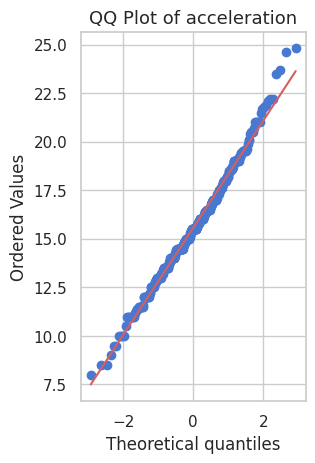

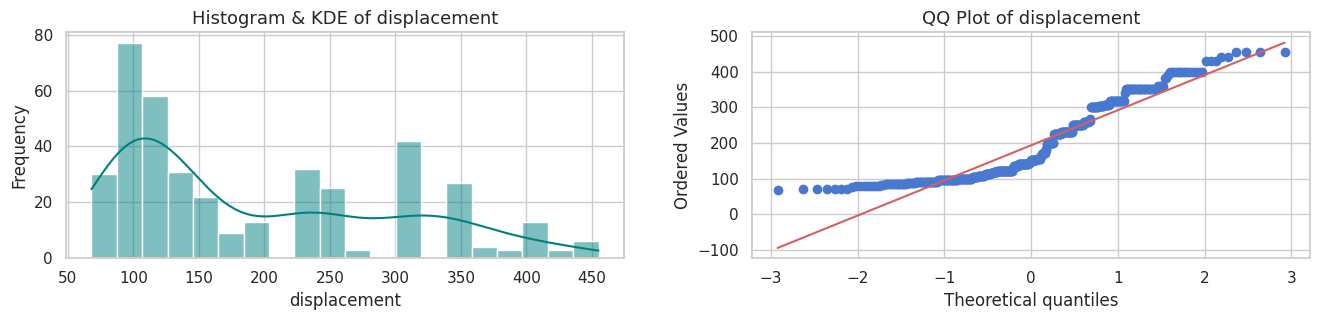

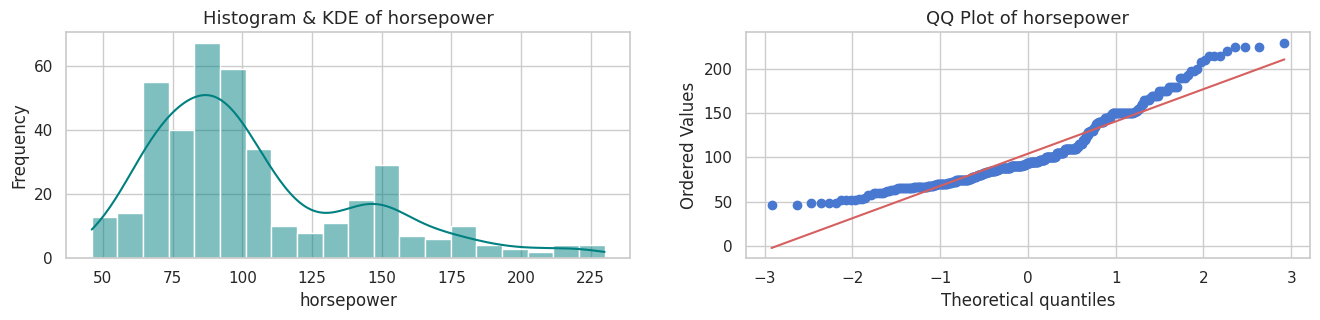

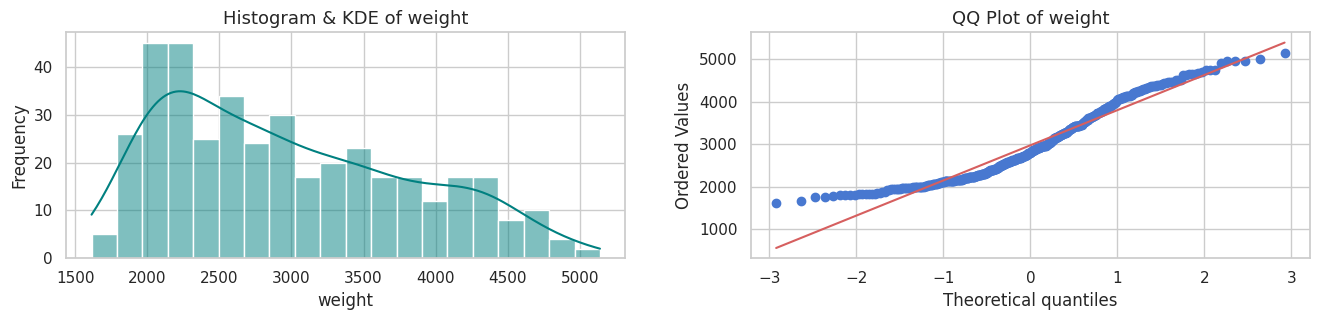

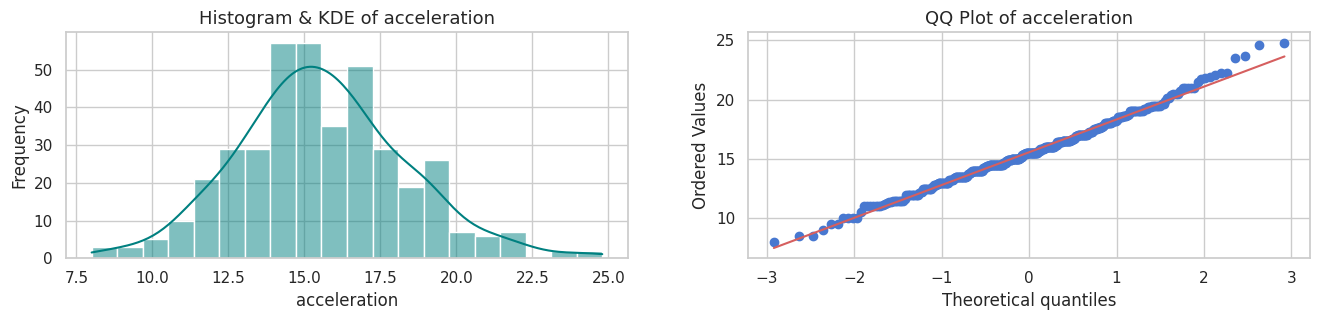

In [ ]:
import scipy.stats as stats

# QQ Plot
plt.subplot(1, 2, 2)
stats.probplot(df[col], dist="norm", plot=plt)
plt.title(f'QQ Plot of {col}', fontsize=13)

sns.set(style="whitegrid", palette="muted", color_codes=True)

for col in continuous_var:
    plt.figure(figsize=(14, 4))

    # Histogram with Kernel Density Estimate (KDE)
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='teal', bins=20)
    plt.title(f'Histogram & KDE of {col}', fontsize=13)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Quantile-Quantile (QQ) Plot to check for normality
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {col}', fontsize=13)

    plt.tight_layout(pad=3.0)
    plt.show()

**8. Univariate Outlier Detection**

Identify outliers using IQR-based fences and Z-scores, and visualize with boxplots.


Number of outliers in displacement by IQR method : 0
Number of outliers in horsepower by IQR method : 11
Number of outliers in weight by IQR method : 0
Number of outliers in acceleration by IQR method : 7
Number of outliers in displacement by Z-score method: 0
Number of outliers in horsepower by Z-score method: 5
Number of outliers in weight by Z-score method: 0
Number of outliers in acceleration by Z-score method: 2


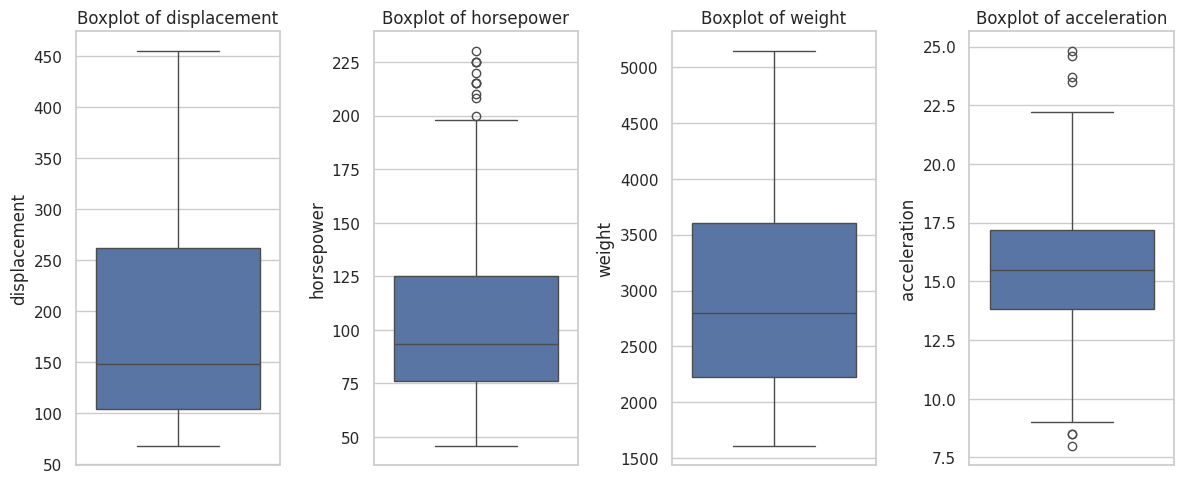

In [ ]:
from scipy.stats import zscore

iqr_outliers = {}
for col in continuous_var:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  iqr_outliers[col] = outliers
  print(f'Number of outliers in {col} by IQR method : {len(outliers)}')

z_outliers = {}
for col in continuous_var:
  z_scores = zscore(df[col].dropna())
  outliers = df[col][np.abs(z_scores) > 3]
  z_outliers[col] = outliers
  print(f'Number of outliers in {col} by Z-score method: {len(outliers)}')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))
for i, col in enumerate(continuous_var):
    plt.subplot(1, len(continuous_var), i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**9. Multivariate Outlier Detection**

Apply Mahalanobis distance to detect extreme observations in the joint feature space

Number of multivariate outliers: 12


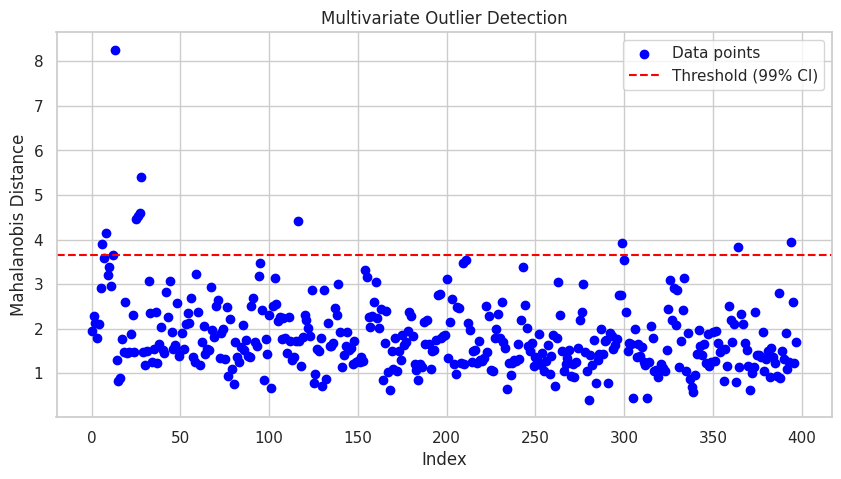

In [ ]:
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

data = df[continuous_var].dropna()

# Mean vector
mean_vec = data.mean().values

# Covariance matrix and its inverse
cov_matrix = np.cov(data.values, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Compute Mahalanobis distance for each row
md = data.apply(lambda x: mahalanobis(x, mean_vec, inv_cov_matrix), axis=1)

# Add distances to DataFrame
data['Mahalanobis_Distance'] = md


# Chi-square threshold
threshold = chi2.ppf(0.99, df=len(continuous_var))  # 99% confidence
outliers = data[data['Mahalanobis_Distance'] > np.sqrt(threshold)]

print(f'Number of multivariate outliers: {len(outliers)}')

plt.figure(figsize=(10,5))
plt.scatter(range(len(data)), data['Mahalanobis_Distance'], color='blue', label='Data points')
plt.axhline(y=np.sqrt(threshold), color='red', linestyle='--', label='Threshold (99% CI)')
plt.xlabel('Index')
plt.ylabel('Mahalanobis Distance')
plt.title('Multivariate Outlier Detection')
plt.legend()
plt.show()


**10. Categorical Frequency Analysis**

Compute frequency counts for cylinders, origin, and model year, and visualize with bar plots.

Frequency counts for cylinders

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64


Frequency counts for origin

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64


Frequency counts for model_year

model_year
73    40
78    36
76    34
82    31
75    30
80    29
79    29
81    29
70    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64




/tmp/ipython-input-4166171992.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=sorted(df[col].unique()))
/tmp/ipython-input-4166171992.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=sorted(df[col].unique()))
/tmp/ipython-input-4166171992.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=sorted(df[col].unique()))


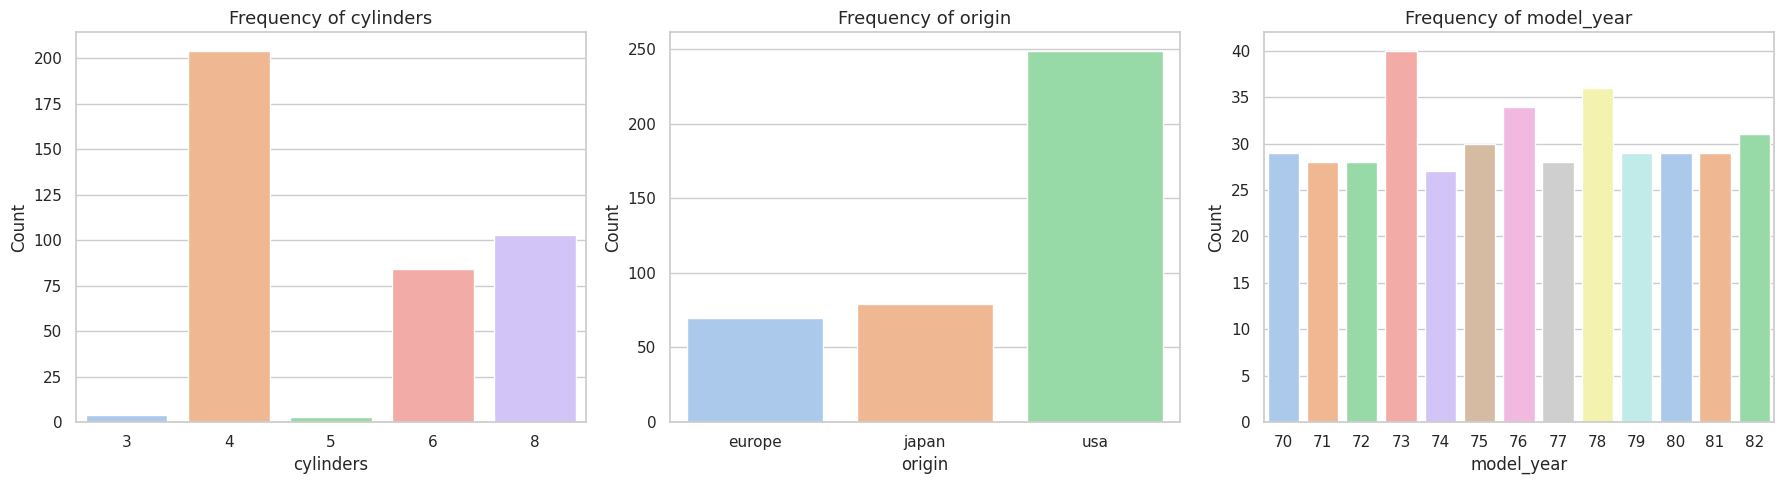

In [ ]:
categorical_var = ['cylinders', 'origin', 'model_year']

for col in categorical_var:
  print(f'Frequency counts for {col}\n')
  print(df[col].value_counts())
  print('\n')

sns.set(style="whitegrid")

plt.figure(figsize=(18,5))

for i, col in enumerate(categorical_var):
    plt.subplot(1, len(categorical_var), i+1)
    sns.countplot(data=df, x=col, palette='pastel', order=sorted(df[col].unique()))
    plt.title(f'Frequency of {col}', fontsize=13)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


**11. Cross-Tabulation Analysis**

Generate cross-tabulations between categorical variables (e.g., cylinders × origin) to identify structural patterns.


Cross-tabulation: Cylinders × Origin

origin     europe  japan  usa
cylinders                    
3               0      4    0
4              63     69   72
5               3      0    0
6               4      6   74
8               0      0  103 

Cross-tabulation: Cylinders × Model Year

model_year  70  71  72  73  74  75  76  77  78  79  80  81  82
cylinders                                                     
3            0   0   1   1   0   0   0   1   0   0   1   0   0
4            7  13  14  11  15  12  15  14  17  12  25  21  28
5            0   0   0   0   0   0   0   0   1   1   1   0   0
6            4   8   0   8   7  12  10   5  12   6   2   7   3
8           18   7  13  20   5   6   9   8   6  10   0   1   0 

Cross-tabulation: Origin × Model Year

model_year  70  71  72  73  74  75  76  77  78  79  80  81  82
origin                                                        
europe       5   4   5   7   6   6   8   4   6   4   9   4   2
japan        2   4   5   4   6   4   

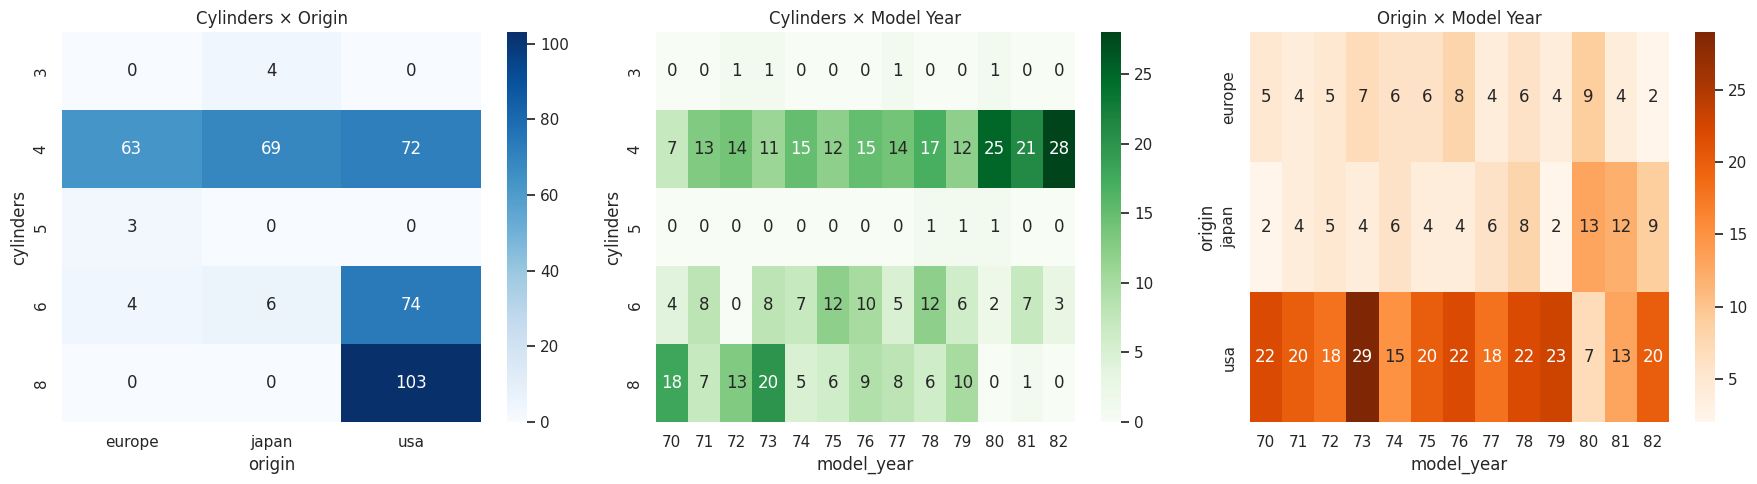

In [ ]:
# Cylinders × Origin
cyl_origin_ct = pd.crosstab(df['cylinders'], df['origin'])
print('Cross-tabulation: Cylinders × Origin\n')
print(cyl_origin_ct, "\n")

# Cylinders × Model Year
cyl_year_ct = pd.crosstab(df['cylinders'], df['model_year'])
print('Cross-tabulation: Cylinders × Model Year\n')
print(cyl_year_ct, "\n")

# Origin × Model Year
origin_year_ct = pd.crosstab(df['origin'], df['model_year'])
print('Cross-tabulation: Origin × Model Year\n')
print(origin_year_ct)

plt.figure(figsize=(18,5))

# Cylinders × Origin
plt.subplot(1,3,1)
sns.heatmap(cyl_origin_ct, annot=True, fmt='d', cmap='Blues')
plt.title('Cylinders × Origin')

# Cylinders × Model Year
plt.subplot(1,3,2)
sns.heatmap(cyl_year_ct, annot=True, fmt='d', cmap='Greens')
plt.title('Cylinders × Model Year')

# Origin × Model Year
plt.subplot(1,3,3)
sns.heatmap(origin_year_ct, annot=True, fmt='d', cmap='Oranges')
plt.title('Origin × Model Year')

plt.tight_layout()
plt.show()

**12. Pairwise Correlation Analysis**

Compute Pearson correlation for linear relationships and Spearman rank correlation for monotonic relationships between numerical predictors and mpg.


In [ ]:
numerical_vars = ['displacement', 'horsepower', 'weight', 'acceleration']
target = 'mpg'

pearson_corr = df[numerical_vars + [target]].corr(method='pearson')[target].drop(target)
print('Pearson Correlation with mpg:\n')
print(pearson_corr.round(3))


spearman_corr = df[numerical_vars + [target]].corr(method='spearman')[target].drop(target)
print('\nSpearman Correlation with mpg:\n')
print(spearman_corr.round(3))

Pearson Correlation with mpg:

displacement   -0.804
horsepower     -0.773
weight         -0.832
acceleration    0.420
Name: mpg, dtype: float64

Spearman Correlation with mpg:

displacement   -0.856
horsepower     -0.848
weight         -0.875
acceleration    0.439
Name: mpg, dtype: float64


**13. Correlation Heatmap Visualization**

Plot a heatmap of the correlation matrix to visually inspect multicollinearity and strong associations.

Correlation matrix:
                 mpg  displacement  horsepower  weight  acceleration
mpg           1.000        -0.804      -0.773  -0.832         0.420
displacement -0.804         1.000       0.896   0.933        -0.544
horsepower   -0.773         0.896       1.000   0.862        -0.687
weight       -0.832         0.933       0.862   1.000        -0.417
acceleration  0.420        -0.544      -0.687  -0.417         1.000


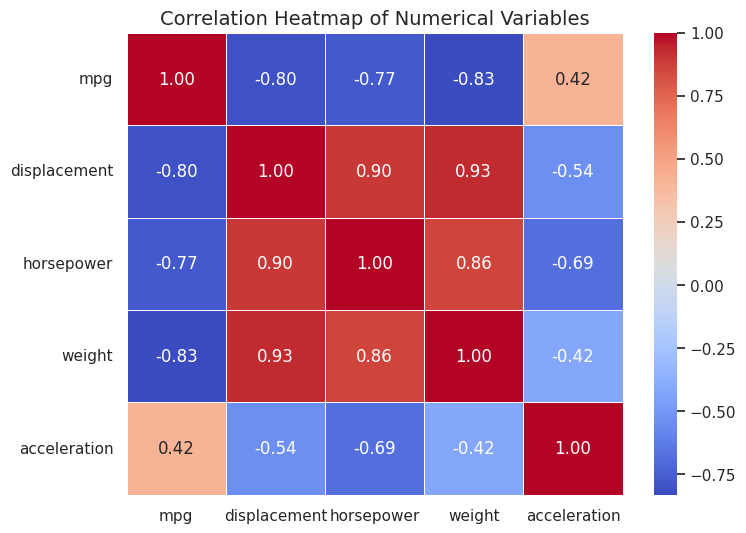

In [ ]:
numerical_vars = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

# Compute correlation matrix
corr_matrix = df[numerical_vars].corr(method='pearson')
print('Correlation matrix:\n', corr_matrix.round(3))

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14)
plt.show()

**14. Bivariate Scatter Analysis**

Create scatterplots for mpg vs. key continuous predictors (weight, displacement, horsepower, acceleration) with regression line overlays.


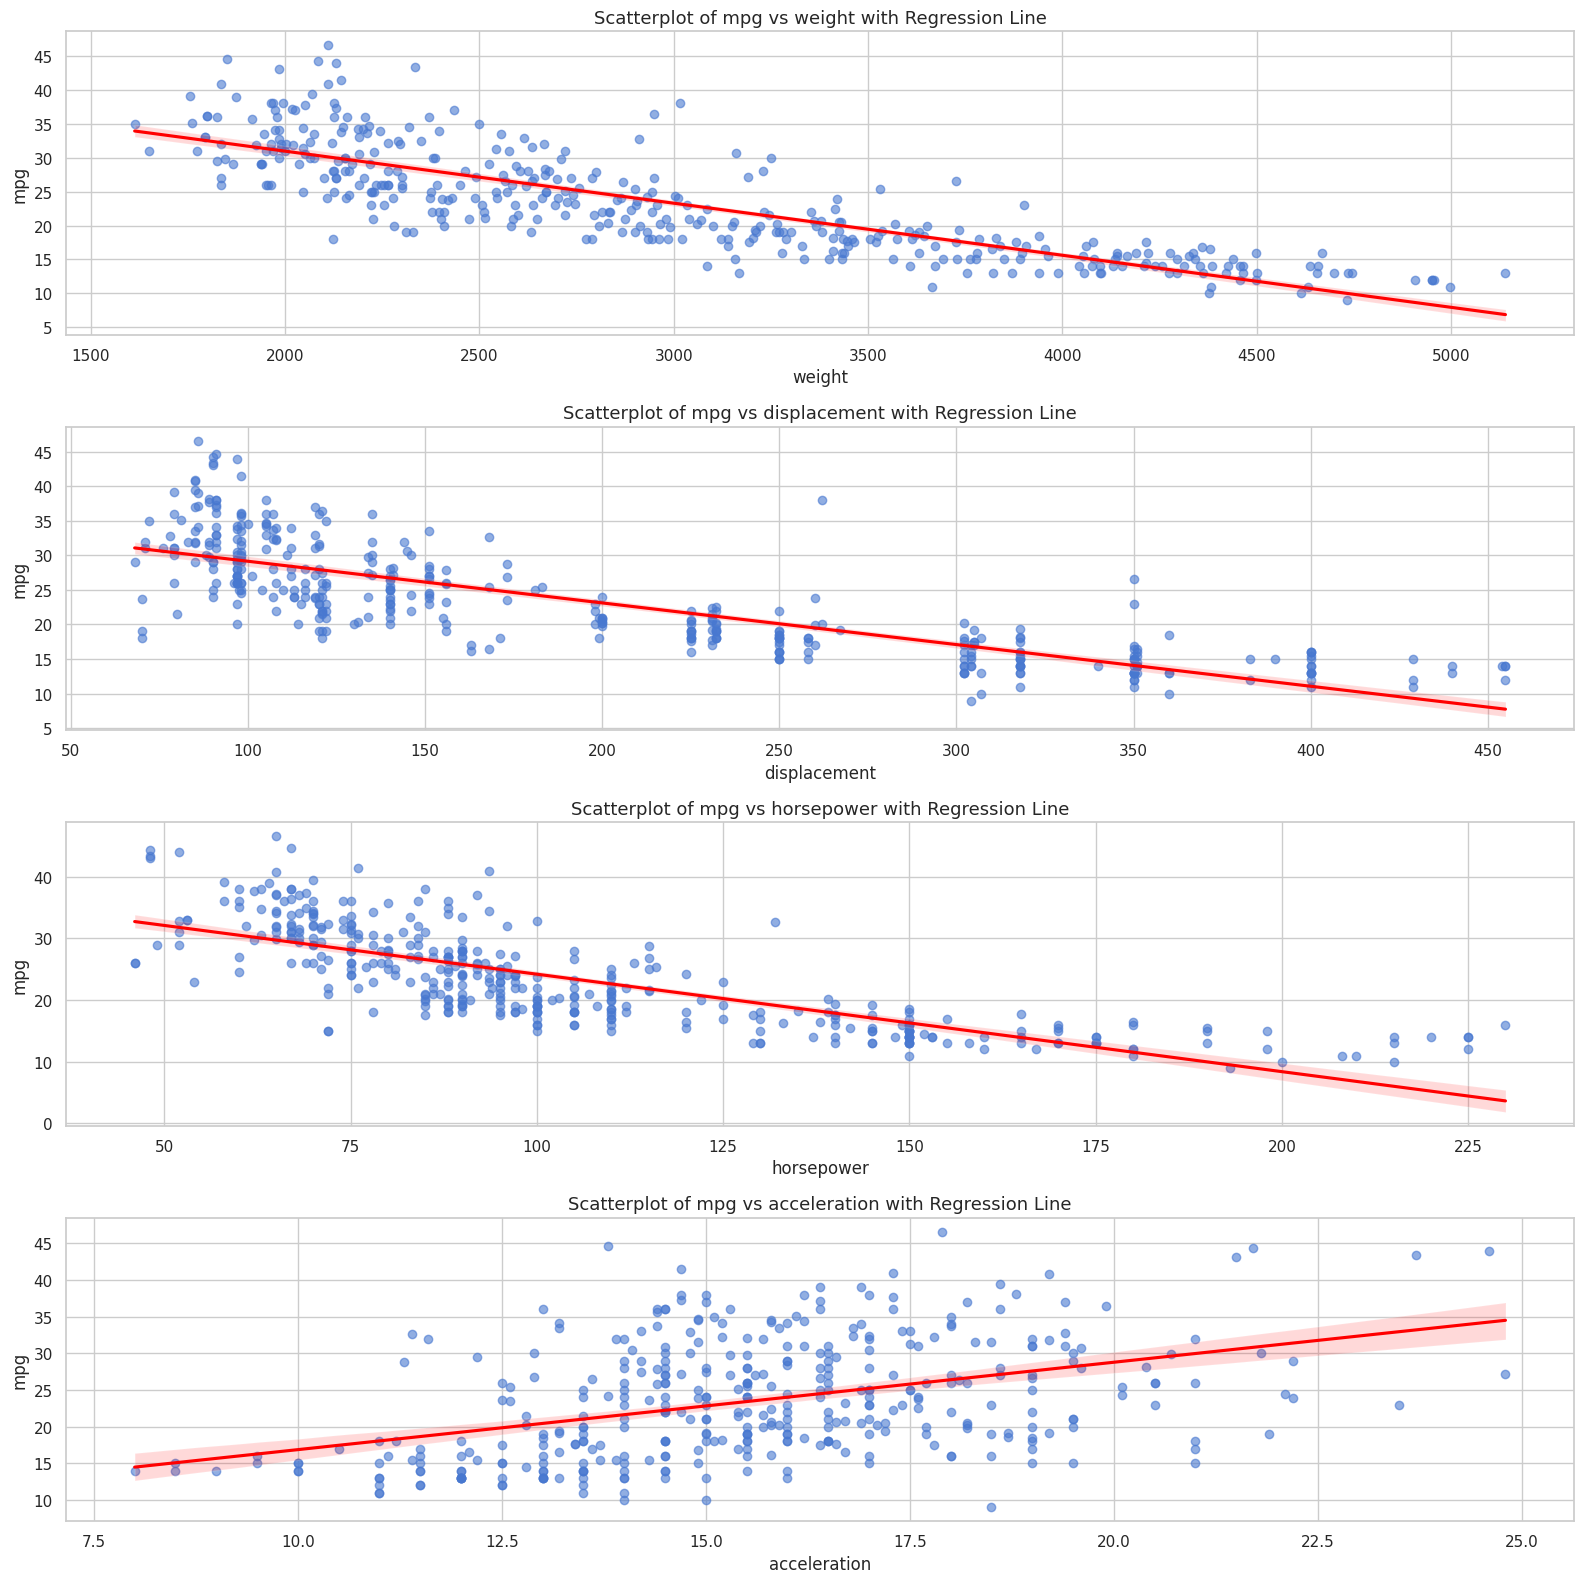

In [ ]:
sns.set(style="whitegrid", palette="muted")

continuous_vars = ['weight', 'displacement', 'horsepower', 'acceleration']
target = 'mpg'

plt.figure(figsize=(16, 4*len(continuous_vars)))

for i, col in enumerate(continuous_vars):
    plt.subplot(len(continuous_vars), 1, i+1)
    sns.regplot(x=col, y=target, data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'Scatterplot of {target} vs {col} with Regression Line', fontsize=13)
    plt.xlabel(col)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

**15. Groupwise MPG Analysis**

Compute and compare mean/variance of mpg grouped by categorical predictors (cylinders, origin, model year).


MPG grouped by Cylinders:
                 mean        var  count
cylinders                             
3          20.550000   6.576667      4
4          29.286765  32.605883    204
5          27.366667  67.703333      3
6          19.985714  14.495697     84
8          14.963107   8.044508    103 

MPG grouped by Origin:
              mean        var  count
origin                             
europe  27.891429  45.211230     70
japan   30.450633  37.088685     79
usa     20.083534  40.997026    249 

MPG grouped by Model Year:
                  mean        var  count
model_year                             
70          17.689655  28.507389     29
71          21.250000  43.453704     28
72          18.714286  29.544974     28
73          17.100000  22.092308     40
74          22.703704  41.216524     27
75          20.266667  24.409195     30
76          21.573529  34.683824     34
77          23.375000  44.567130     28
78          24.061111  47.583016     36
79          25.093103  4

/tmp/ipython-input-179284769.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cylinders_stats.index, y=cylinders_stats['mean'], palette='pastel')
/tmp/ipython-input-179284769.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=origin_stats.index, y=origin_stats['mean'], palette='muted')
/tmp/ipython-input-179284769.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_stats.index, y=year_stats['mean'], palette='bright')


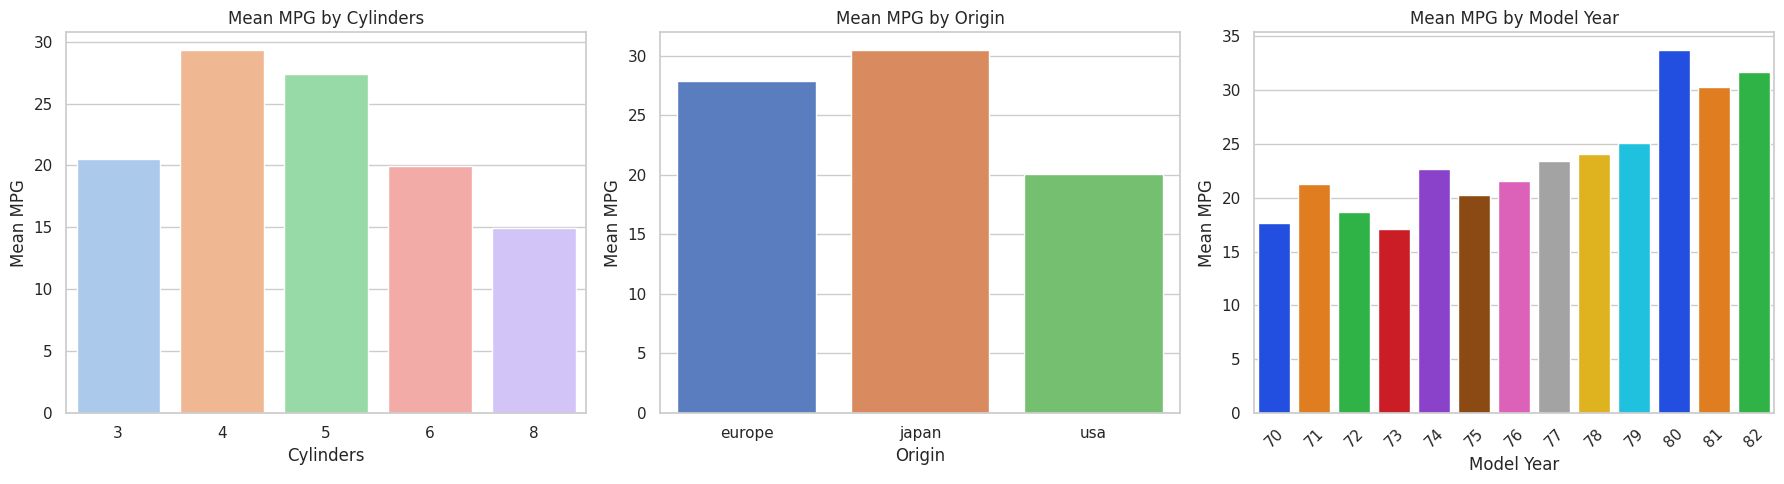

In [ ]:
cylinders_stats = df.groupby('cylinders')['mpg'].agg(['mean', 'var', 'count'])
print('MPG grouped by Cylinders:\n', cylinders_stats, '\n')

origin_stats = df.groupby('origin')['mpg'].agg(['mean', 'var', 'count'])
print('MPG grouped by Origin:\n', origin_stats, '\n')

year_stats = df.groupby('model_year')['mpg'].agg(['mean', 'var', 'count'])
print("MPG grouped by Model Year:\n", year_stats)

plt.figure(figsize=(18,5))

# MPG vs Cylinders
plt.subplot(1,3,1)
sns.barplot(x=cylinders_stats.index, y=cylinders_stats['mean'], palette='pastel')
plt.title('Mean MPG by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Mean MPG')

# MPG vs Origin
plt.subplot(1,3,2)
sns.barplot(x=origin_stats.index, y=origin_stats['mean'], palette='muted')
plt.title('Mean MPG by Origin')
plt.xlabel('Origin')
plt.ylabel('Mean MPG')

# MPG vs Model Year
plt.subplot(1,3,3)
sns.barplot(x=year_stats.index, y=year_stats['mean'], palette='bright')
plt.title('Mean MPG by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Mean MPG')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**16. ANOVA for Categorical Comparisons**

Conduct one-way ANOVA to test whether mpg differs significantly across cylinder categories. Perform post-hoc comparisons if significant.


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Inspect cylinder categories
print(df['cylinders'].value_counts())

# Fit the ANOVA model
model = ols('mpg ~ C(cylinders)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA table:\n', anova_table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['mpg'], groups=df['cylinders'], alpha=0.05)
print(tukey.summary())

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64
ANOVA table:
                     sum_sq     df           F        PR(>F)
C(cylinders)  15454.761883    4.0  172.591785  3.679939e-85
Residual       8797.813594  393.0         NaN           NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     3      4   8.7368 0.0027   2.1903  15.2832   True
     3      5   6.8167 0.3264  -3.0866  16.7199  False
     3      6  -0.5643 0.9993     -7.2   6.0715  False
     3      8  -5.5869 0.1416 -12.1948    1.021  False
     4      5  -1.9201 0.9569  -9.4611   5.6209  False
     4      6  -9.3011    0.0  -10.982  -7.6201   True
     4      8 -14.3237    0.0  -15.891 -12.7564   True
     5      6   -7.381 0.0627 -14.9996   0.2377  False
     5      8 -12.4036 0.0001 -19.9979  -4.8092   True
     6      8  -5.0226    0.0  -6.9289  -3.1164   True
----------

**17. Temporal Trend Analysis**

Analyze changes in average mpg across model year and visualize as a time-series trend.


    model_year        mpg
0           70  17.689655
1           71  21.250000
2           72  18.714286
3           73  17.100000
4           74  22.703704
5           75  20.266667
6           76  21.573529
7           77  23.375000
8           78  24.061111
9           79  25.093103
10          80  33.696552
11          81  30.334483
12          82  31.709677


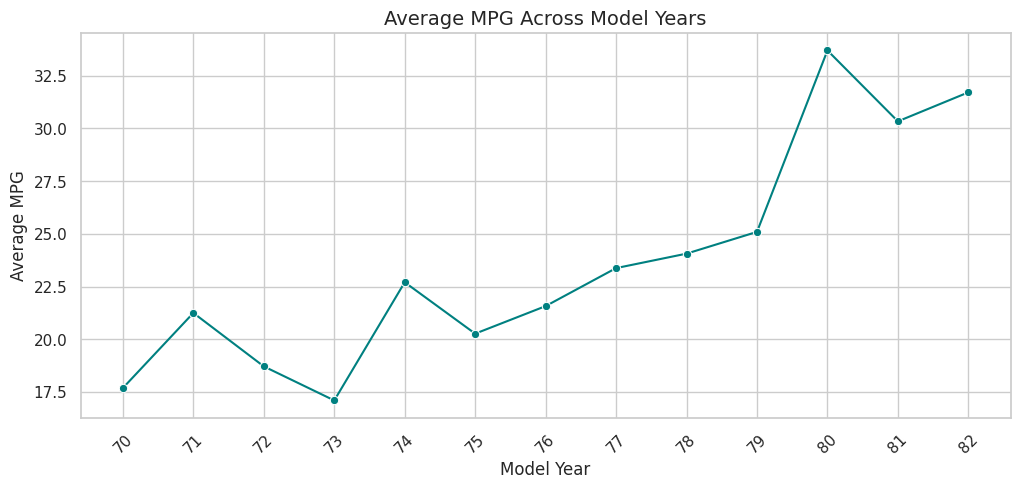

In [ ]:
# Group by model_year and calculate mean mpg
mpg_by_year = df.groupby('model_year')['mpg'].mean().reset_index()
mpg_by_year = mpg_by_year.sort_values('model_year')

print(mpg_by_year)

sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(12,5))
sns.lineplot(x='model_year', y='mpg', data=mpg_by_year, marker='o', color='teal')
plt.title('Average MPG Across Model Years', fontsize=14)
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.xticks(mpg_by_year['model_year'], rotation=45)
plt.grid(True)
plt.show()

**18. Interaction Effect Exploration**

Examine potential interaction effects, e.g., whether the relationship between weight and mpg differs across cylinder groups.


<Figure size 1000x600 with 0 Axes>

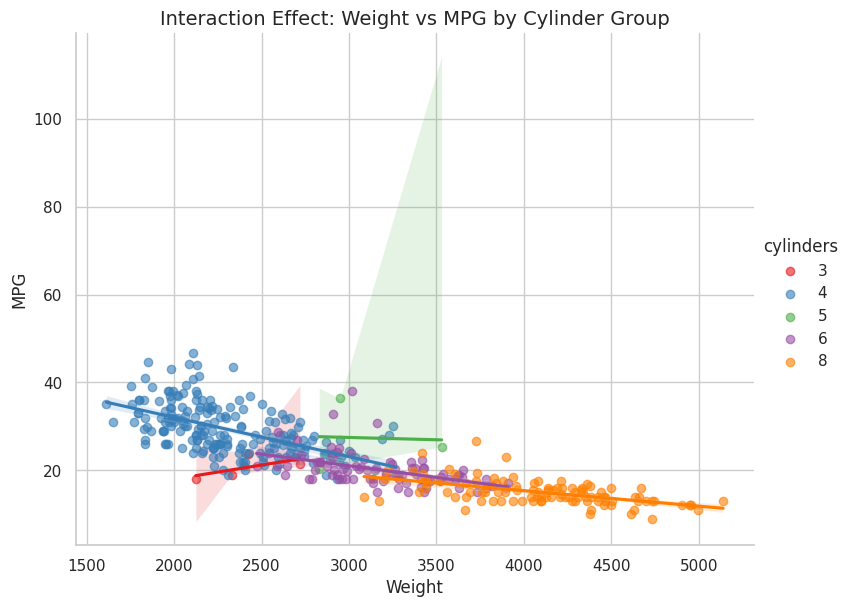

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     122.2
Date:                Sun, 09 Nov 2025   Prob (F-statistic):          1.84e-107
Time:                        09:41:25   Log-Likelihood:                -1115.1
No. Observations:                 398   AIC:                             2250.
Df Residuals:                     388   BIC:                             2290.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(10,6))
sns.lmplot(data=df, x='weight', y='mpg', hue='cylinders', palette='Set1', height=6, aspect=1.3, markers='o', scatter_kws={'alpha':0.6})
plt.title('Interaction Effect: Weight vs MPG by Cylinder Group', fontsize=14)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

import statsmodels.formula.api as smf

# Linear model with interaction: mpg ~ weight + cylinders + weight*cylinders
model = smf.ols('mpg ~ weight * C(cylinders)', data=df).fit()
print(model.summary())

**19. Non-Linear Relationship Analysis**

Test for polynomial or logarithmic trends in predictors such as displacement or weight vs. mpg.


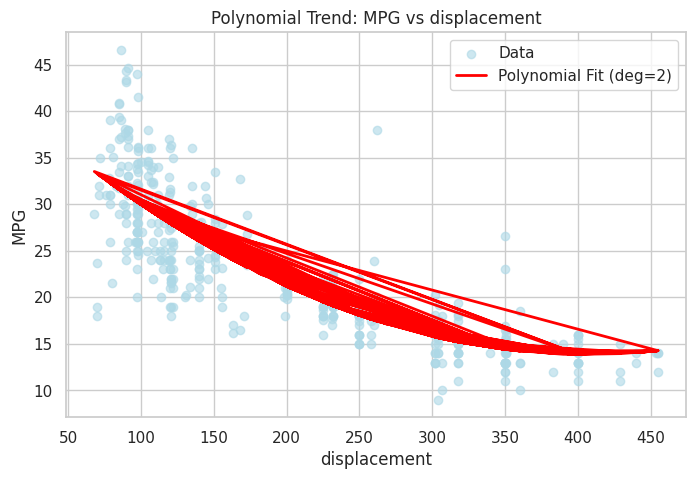

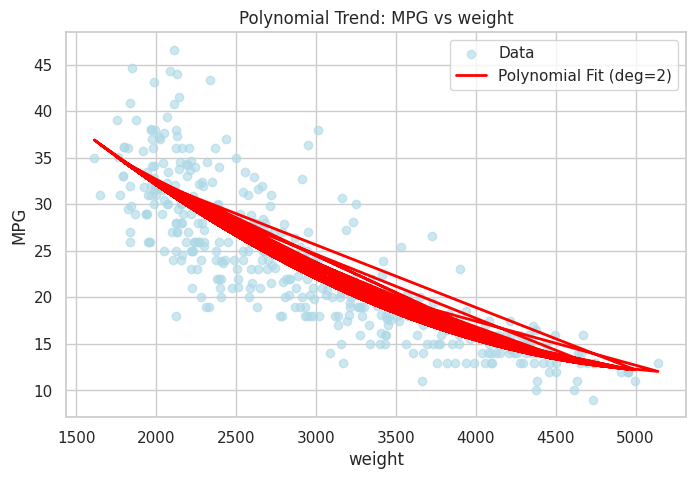

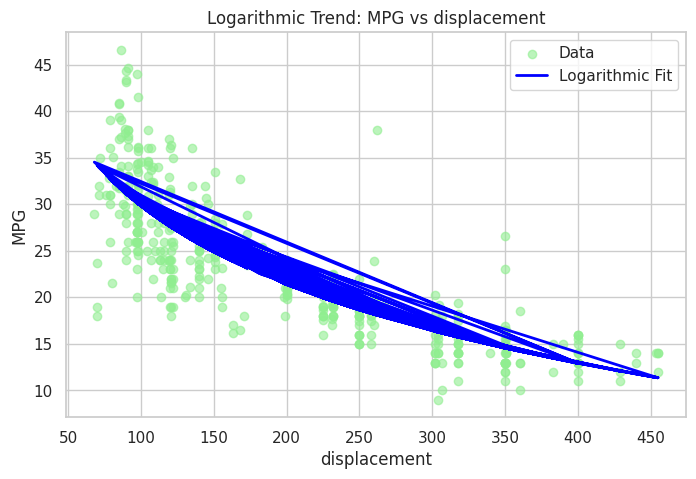

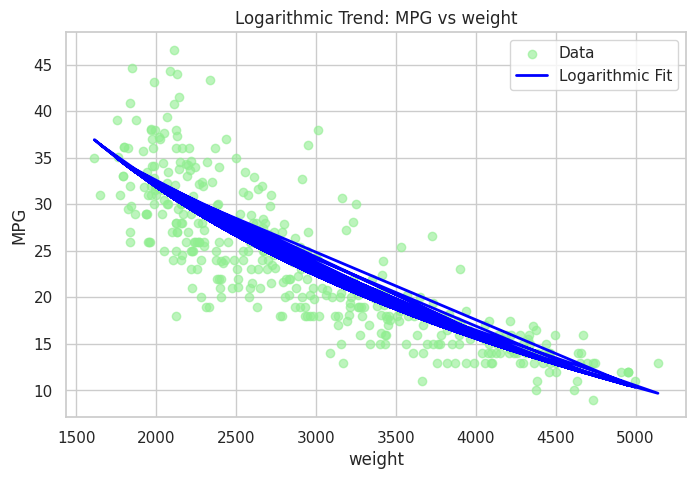

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid", palette="muted")

predictors = ['displacement', 'weight']

for col in predictors:
    X = df[[col]].values
    y = df['mpg'].values

    # Polynomial features (degree 2)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    # Predictions
    y_pred = model.predict(X_poly)

    # Plot
    plt.figure(figsize=(8,5))
    plt.scatter(X, y, color='lightblue', alpha=0.6, label='Data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Polynomial Fit (deg=2)')
    plt.title(f'Polynomial Trend: MPG vs {col}')
    plt.xlabel(col)
    plt.ylabel('MPG')
    plt.legend()
    plt.show()

for col in predictors:
    X_log = np.log(df[[col]].values)
    y = df['mpg'].values

    model = LinearRegression()
    model.fit(X_log, y)

    y_pred = model.predict(X_log)

    plt.figure(figsize=(8,5))
    plt.scatter(df[col], y, color='lightgreen', alpha=0.6, label='Data')
    plt.plot(df[col], y_pred, color='blue', linewidth=2, label='Logarithmic Fit')
    plt.title(f'Logarithmic Trend: MPG vs {col}')
    plt.xlabel(col)
    plt.ylabel('MPG')
    plt.legend()
    plt.show()

**20. Dimensionality Reduction (Exploratory)**

Apply Principal Component Analysis (PCA) on standardized continuous variables to identify dominant variance components and potential feature redundancy.

Explained Variance Ratio per Component:
 [0.784 0.143 0.045 0.017 0.011]
Cumulative Explained Variance:
 [0.784 0.927 0.972 0.989 1.   ]


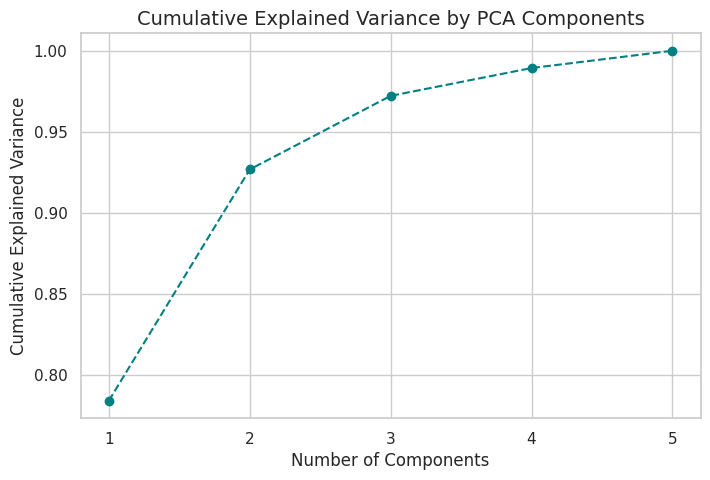

PCA Component Loadings:
                 PC1    PC2    PC3    PC4    PC5
mpg          -0.444 -0.308  0.838  0.004  0.077
displacement  0.484  0.133  0.366 -0.460 -0.634
horsepower    0.484 -0.125  0.218  0.828 -0.132
weight        0.472  0.324  0.302 -0.188  0.739
acceleration -0.335  0.876  0.159  0.260 -0.169


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

continuous_vars = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
X = df[continuous_vars].dropna()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

# Explained variance ratio
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print('Explained Variance Ratio per Component:\n', np.round(explained_var, 3))
print('Cumulative Explained Variance:\n', np.round(cumulative_var, 3))

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='o', linestyle='--', color='teal')
plt.title('Cumulative Explained Variance by PCA Components', fontsize=14)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_var)+1))
plt.grid(True)
plt.show()

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(continuous_vars))], index=continuous_vars)
print('PCA Component Loadings:\n', loadings.round(3))

# **Task 2: Regression & Classification**

*   Regression target: raw mpg values

*   Classification target: binned mpg categories (low/medium/high)

*   Linear Regression → Regression

*   Logistic Regression → Classification

*   K-Nearest Neighbors (KNN Classifier) → Classification

*   Support Vector Regression (SVR) → Regression

*   Support Vector Machine (SVM Classifier) → Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset Load**

In [ ]:
df = sns.load_dataset("mpg").dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


**Create Regression & Classification Target**

In [ ]:
median_mpg = df["mpg"].median()
df["mpg_class"] = np.where(df["mpg"] >= median_mpg, 1, 0)

df[["mpg", "mpg_class"]].sample(5)

,mpg,mpg_class
397,31.0,1
322,46.6,1
115,15.0,0
331,33.8,1
214,13.0,0


**Feature Selection + Train/Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

features = ["cylinders", "displacement", "horsepower", "weight", "acceleration"]
X = df[features]
y_reg = df["mpg"]
y_clf = df["mpg_class"]

X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.25, random_state=42
)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.25, random_state=42, stratify=y_clf
)

**Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train_reg)
y_pred_lin = linreg.predict(X_test_scaled)

print('R^2:', r2_score(y_test_reg, y_pred_lin))
print('RMSE:', np.sqrt(mean_squared_error(y_test_reg, y_pred_lin)))

R^2: 0.659817162471154
RMSE: 4.142038052563035


**Support Vector Regression**

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1.0, gamma='scale')
svr.fit(X_train_scaled, y_train_reg)
y_pred_svr = svr.predict(X_test_scaled)

print('R^2:', r2_score(y_test_reg, y_pred_svr))
print('RMSE:', np.sqrt(mean_squared_error(y_test_reg, y_pred_svr)))

R^2: 0.6927856911066089
RMSE: 3.936213119695013


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_clf_scaled, y_train_clf)
y_pred_log = logreg.predict(X_test_clf_scaled)

print('Accuracy:', accuracy_score(y_test_clf, y_pred_log))
print(confusion_matrix(y_test_clf, y_pred_log))
print(classification_report(y_test_clf, y_pred_log))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print('Cross-Val Accuracy:', cross_val_score(logreg, X, y_clf, cv=cv).mean())

Accuracy: 0.9081632653061225
[[45  4]
 [ 5 44]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.92      0.90      0.91        49

    accuracy                           0.91        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98

Cross-Val Accuracy: 0.8928919182083739


**KNN Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_clf_scaled, y_train_clf)
y_pred_knn = knn.predict(X_test_clf_scaled)

print('Accuracy:', accuracy_score(y_test_clf, y_pred_knn))
print(confusion_matrix(y_test_clf, y_pred_knn))
print(classification_report(y_test_clf, y_pred_knn))

print('Cross-Val Accuracy:', cross_val_score(knn, X, y_clf, cv=cv).mean())

Accuracy: 0.9285714285714286
[[44  5]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        49
           1       0.90      0.96      0.93        49

    accuracy                           0.93        98
   macro avg       0.93      0.93      0.93        98
weighted avg       0.93      0.93      0.93        98

Cross-Val Accuracy: 0.8673158065563129


**SVM Classifier**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train_clf_scaled, y_train_clf)
y_pred_svm = svm.predict(X_test_clf_scaled)

print('Accuracy:', accuracy_score(y_test_clf, y_pred_svm))
print(confusion_matrix(y_test_clf, y_pred_svm))
print(classification_report(y_test_clf, y_pred_svm))

print('Cross-Val Accuracy:', cross_val_score(svm, X, y_clf, cv=cv).mean())

Accuracy: 0.9183673469387755
[[44  5]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        49
           1       0.90      0.94      0.92        49

    accuracy                           0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98

Cross-Val Accuracy: 0.8697825381369684


**SVM Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=cv, refit=True)
grid.fit(X_train_clf_scaled, y_train_clf)

print('Best Parameters:', grid.best_params_)
print('Best CV Score:', grid.best_score_)

y_pred_tuned = grid.predict(X_test_clf_scaled)
print('Tuned Accuracy:', accuracy_score(y_test_clf, y_pred_tuned))
print(classification_report(y_test_clf, y_pred_tuned))

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best CV Score: 0.9184102863822327
Tuned Accuracy: 0.9489795918367347
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        49
           1       0.94      0.96      0.95        49

    accuracy                           0.95        98
   macro avg       0.95      0.95      0.95        98
weighted avg       0.95      0.95      0.95        98



**Decision Boundary Plot**

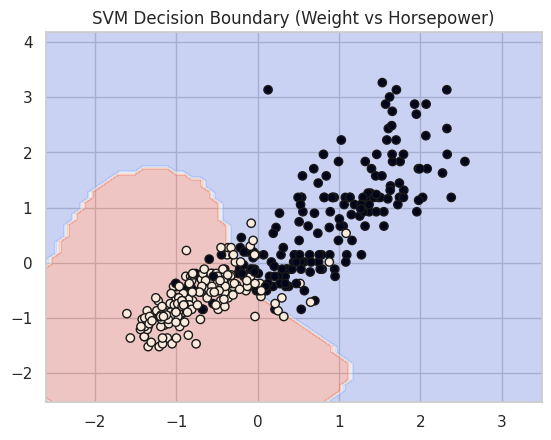

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

def plot_decision_boundary(X, y, model, title):
    h = 0.1
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k")
    plt.title(title)
    plt.show()

X_2d = df[['weight','horsepower']].values
y_2d = df['mpg_class'].values

X_2d_scaled = StandardScaler().fit_transform(X_2d)
svm_2d = SVC(kernel='rbf', C=1, gamma='scale')
svm_2d.fit(X_2d_scaled, y_2d)

plot_decision_boundary(X_2d_scaled, y_2d, svm_2d, 'SVM Decision Boundary (Weight vs Horsepower)')